In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Flight_Price_Prediction/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [26]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
year               0
month              0
Day                0
dtype: int64

In [3]:
df.dropna(axis = 0, inplace = True)
df.shape

(10682, 11)

Only one row needs to be dropped as Route & Total Stops is null, hence dropping the same

In [27]:
df.describe()

,Price,year,month,Day
count,10683.000000,10683.0,10683.000000,10683.000000
mean,9087.064121,2019.0,5.534775,12.682205
std,4611.359167,0.0,2.987489,8.803701
min,1759.000000,2019.0,1.000000,3.000000
25%,5277.000000,2019.0,3.000000,5.000000
50%,8372.000000,2019.0,5.000000,6.000000
75%,12373.000000,2019.0,6.000000,21.000000
max,79512.000000,2019.0,12.000000,27.000000


Maximum ticket price is INR 79512 

Minimum ticket price is INR 1759

In [8]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [9]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

All the flight are from 5 different cities to all other 6 different cities except the same city.

In [4]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [14]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

# Data Visualization

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

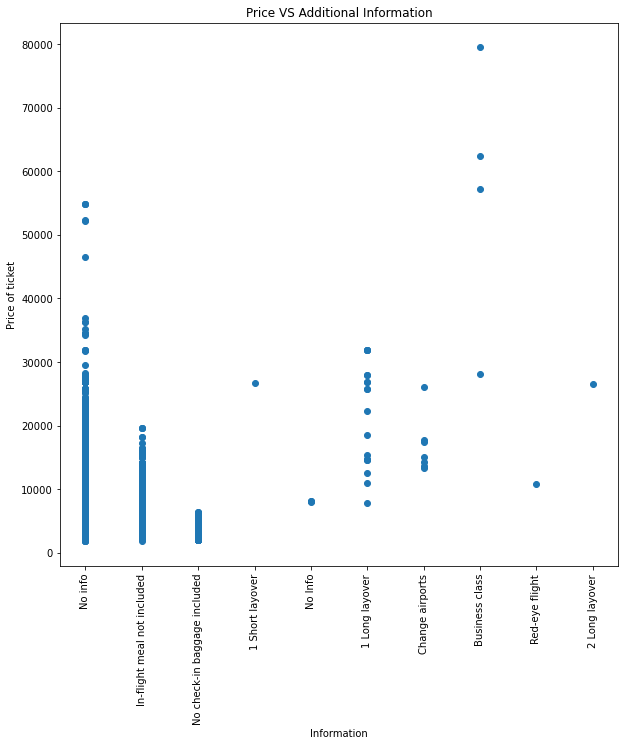

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.title('Price VS Additional Information')
plt.scatter( df['Additional_Info'], df['Price'] )
plt.xlabel('Information')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

Through scatter plot, we can see that ticket prices for Business class is higher.

Text(0, 0.5, 'Count of flights')

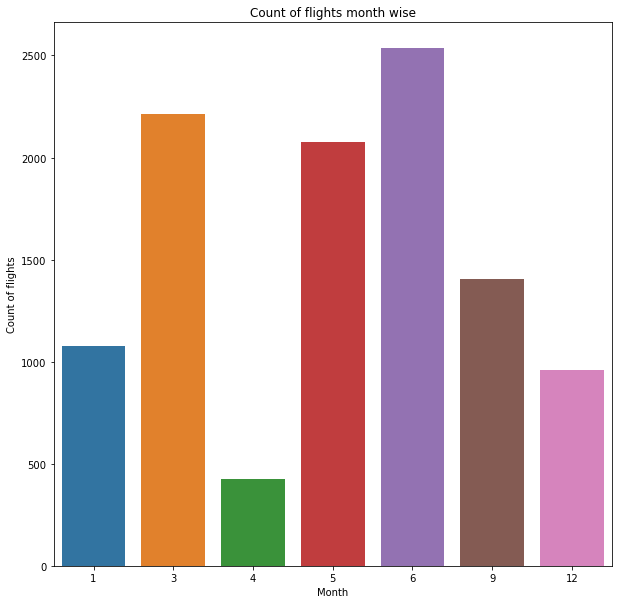

In [19]:
import seaborn as sns

plt.figure(figsize = (10 , 10))
plt.title('Count of flights month wise')
sns.countplot(x = 'month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

2500 flights scheduled in month of June and lower than 500 flights scheduled in April month

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

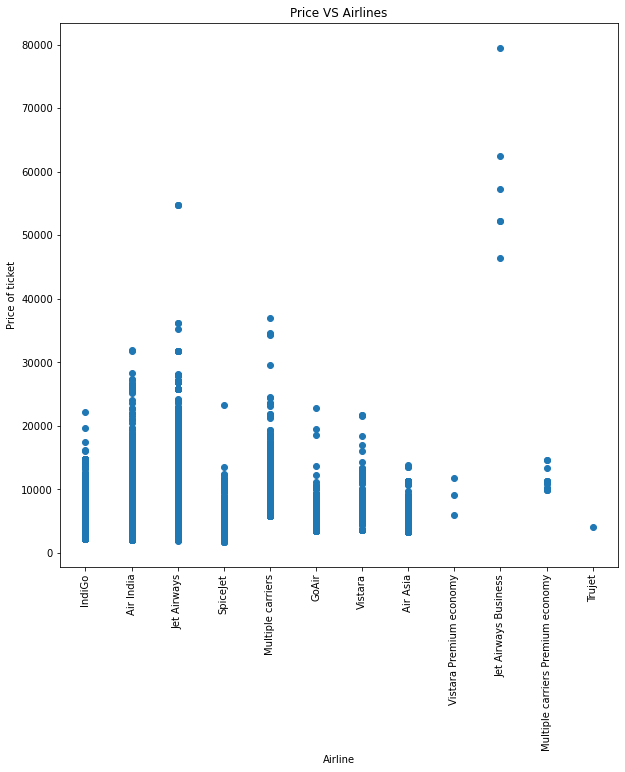

In [23]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

The ticket rate for Jet Airways Business airline is high.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

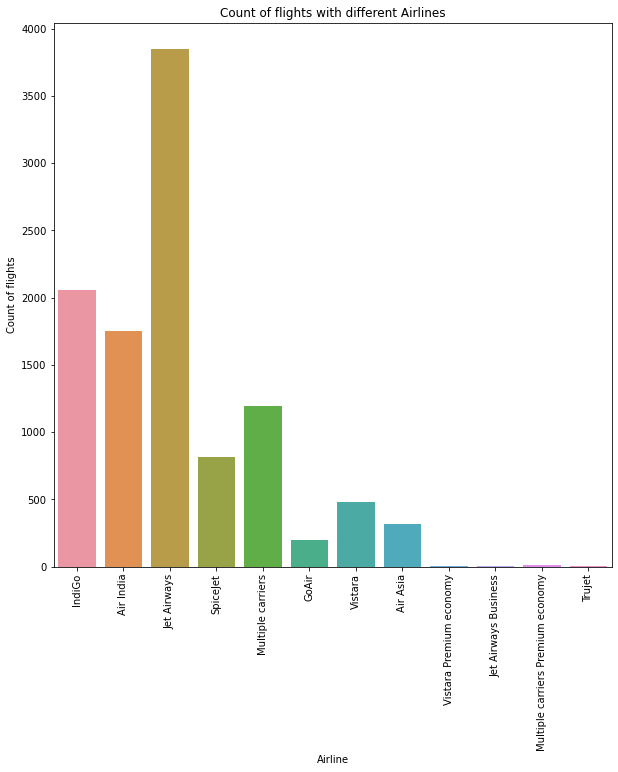

In [25]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

Jet Airways have almost 4000 flights, which is greatest in the dataset.

Trujet, Vistara Premium economy and Jet Airways Business have very less flights.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  year             10682 non-null  int64 
 12  month            10682 non-null  int64 
 13  Day              10682 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.2+ MB


In [5]:
def Dep_period( x ):
    if int( x[:2] ) >= 0 and int( x[:2] ) < 6:
        return 'Mid Night'
    elif int( x[:2] ) >= 6 and int( x[:2] ) < 12:
        return 'Morning'
    elif int( x[:2] ) >= 12 and int( x[:2] ) < 18:
        return 'Afternoon'
    elif int( x[:2] ) >= 18 and int( x[:2] ) < 24:
        return 'Evening'

In [6]:
df['Dep_Period'] = df['Dep_Time'].apply( Dep_period )

Applying function to convert or bifurcate Dep Time into parocular Departure Intervals as Morning, Evening, Afternnon & Mid Night

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day,Dep_Period
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,Evening
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5,Mid Night
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,Morning
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5,Evening
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3,Afternoon


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Airline'] = le.fit_transform ( df['Airline'] )
df['Source'] = le.fit_transform ( df['Source'] )
df['Destination'] = le.fit_transform ( df['Destination'] )
df['Total_Stops'] = le.fit_transform ( df['Total_Stops'] )
df['Additional_Info'] = le.fit_transform ( df['Additional_Info'] )
df['Dep_Period'] = le.fit_transform ( df['Dep_Period'] )

df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,Day,Dep_Period
0,3,0,5,4,8,3897,2019,3,24,1
1,1,3,0,1,8,7662,2019,1,5,2
2,4,2,1,1,8,13882,2019,9,6,3
3,3,3,0,0,8,6218,2019,12,5,1
4,3,0,5,0,8,13302,2019,1,3,0


In [22]:
df.drop( ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True )
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,Day,Dep_Period
0,3,0,5,4,8,3897,2019,3,24,1
1,1,3,0,1,8,7662,2019,1,5,2
2,4,2,1,1,8,13882,2019,9,6,3
3,3,3,0,0,8,6218,2019,12,5,1
4,3,0,5,0,8,13302,2019,1,3,0


# Model Selection

In [23]:
x = df.drop(['Price'], axis = 1)
y = df['Price']

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform (x)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)

In [27]:
import numpy as np

print('Score with Linear Regression is', r2_score( y_test, y_pred ))
print('LinearRegression RMSE value : ' , np.sqrt(mean_squared_error( y_test, y_pred )))

Score with Linear Regression is 0.3828525672128481
LinearRegression RMSE value :  3624.9931012055204


now will try with KNeighborsRegressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
knn_grid = [{'n_neighbors': [i+1 for i in range(10)] }, ]

knn_search = GridSearchCV (knn, knn_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)
knn_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
knn_search.best_params_

{'n_neighbors': 3}

In [30]:
result = knn_search.cv_results_
result

{'mean_fit_time': array([0.11982961, 0.12303138, 0.11249609, 0.11252789, 0.11497879,
        0.11795015, 0.11888928, 0.11544666, 0.11473989, 0.11646361]),
 'std_fit_time': array([0.00568108, 0.01865495, 0.00778503, 0.01364937, 0.00386237,
        0.00296419, 0.00593808, 0.00354009, 0.0039141 , 0.00422816]),
 'mean_score_time': array([0.11349249, 0.12934427, 0.14244599, 0.15135741, 0.17005701,
        0.18529468, 0.19066381, 0.19899373, 0.21772265, 0.21170273]),
 'std_score_time': array([0.00532712, 0.01229824, 0.00695247, 0.01226654, 0.00643376,
        0.00750552, 0.00644329, 0.00738972, 0.00945702, 0.01506302]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


In [18]:
for mts, param in zip(result['mean_test_score'], result['params']):
    print (mts, param)

-6756196.821767116 {'n_neighbors': 1}
-6022063.802457578 {'n_neighbors': 2}
-5840222.2665496385 {'n_neighbors': 3}
-5930948.061380925 {'n_neighbors': 4}
-6060268.706626097 {'n_neighbors': 5}
-6187571.701427085 {'n_neighbors': 6}
-6393378.516697913 {'n_neighbors': 7}
-6579272.440411059 {'n_neighbors': 8}
-6794799.239649206 {'n_neighbors': 9}
-6977898.403229957 {'n_neighbors': 10}


In [31]:
from sklearn.metrics import mean_squared_error

knn_reg = knn_search.best_estimator_
knn_reg.fit(x_train, y_train)
knn_pred = knn_reg.predict(x_test)
print('KNN RMSE value : ' , np.sqrt(mean_squared_error(knn_pred, y_test)))
print('Score with KNN Regression is', r2_score( y_test, knn_pred ))

KNN RMSE value :  2099.104288950255
Score with KNN Regression is 0.7930608838024065


Now will try with SVR

In [33]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma}

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)
svm_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
svm_search.best_params_

{'kernel': 'poly', 'gamma': 1, 'C': 1}

In [37]:
result = svm_search.cv_results_
result

{'mean_fit_time': array([18.68873677, 15.42323976,  9.94098907, 10.49126439,  8.48887835,
        12.76156011, 13.76215868, 10.28300543,  8.48010535, 10.33823571]),
 'std_fit_time': array([0.4863106 , 5.17238692, 0.45150383, 0.10529412, 0.10700497,
        0.10256903, 0.17327399, 0.33911942, 0.21570788, 0.40466905]),
 'mean_score_time': array([10.10530396,  8.74630871,  1.90703259,  1.89381275,  1.36069026,
         2.54631643,  2.64406023,  5.62447486,  1.32979312,  1.45909777]),
 'std_score_time': array([0.3955338 , 2.57629204, 0.06850299, 0.05222326, 0.00540629,
        0.05065572, 0.0471514 , 0.16427219, 0.04176637, 0.15661871]),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'sigmoid', 'sigmoid', 'linear',
                    'sigmoid', 'sigmoid', 'rbf', 'linear', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.01, 0.1,

In [38]:
for mts, params in zip(result['mean_test_score'], result['params']):
    print(mts, params)

-19254731.61963595 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
-20970486.3986431 {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
-21785351.653197378 {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 1}
-21987125.54067383 {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 0.01}
-21785068.496508423 {'kernel': 'linear', 'gamma': 1, 'C': 0.01}
-21526083.52879546 {'kernel': 'sigmoid', 'gamma': 1, 'C': 0.1}
-28525778.051782787 {'kernel': 'sigmoid', 'gamma': 1, 'C': 10}
-20353611.3857427 {'kernel': 'rbf', 'gamma': 1, 'C': 10}
-21785068.496508423 {'kernel': 'linear', 'gamma': 0.1, 'C': 0.01}
-12058847.838631239 {'kernel': 'poly', 'gamma': 1, 'C': 1}


In [39]:
svm_reg = svm_search.best_estimator_
svm_reg.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error

svm_pred = svm_reg.predict(x_test)
print('SVR RMSE value : ' , np.sqrt(mean_squared_error(svm_pred, y_test)))
print('Score with SVR Regression is', r2_score( y_test, svm_pred ))

SVR RMSE value :  3327.754892096182
Score with SVR Regression is 0.4606765523306062


Now will try with RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

ensemble = RandomForestRegressor()
ensemble_grid =  {'n_estimators': [(i+1)*10 for i in range(20)], 'criterion': ['mse', 'mae'], 'bootstrap': [True, False]}


ensemble_search = RandomizedSearchCV(ensemble, ensemble_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=10, verbose=1)
ensemble_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [41]:
ensemble_search.best_params_

{'n_estimators': 110, 'criterion': 'mse', 'bootstrap': True}

In [42]:
result = ensemble_search.cv_results_
result

{'mean_fit_time': array([  2.92428741,   4.75222669,   1.8305759 , 193.37805309,
          2.66160846,   2.88646193,   6.24502573,  47.9026773 ,
          2.83596849, 518.05946178]),
 'std_fit_time': array([1.26840759e-01, 3.70001485e-02, 3.81150996e-02, 2.40059127e+00,
        1.01868904e-01, 4.13477704e-02, 1.47641120e-01, 1.02057797e+00,
        3.57339115e-02, 7.49761948e+01]),
 'mean_score_time': array([0.07938752, 0.17565565, 0.06811357, 0.13730335, 0.08879528,
        0.10823317, 0.16609201, 0.03677063, 0.07381105, 0.1566216 ]),
 'std_score_time': array([0.01347822, 0.02554689, 0.00712975, 0.00754145, 0.01715082,
        0.01640389, 0.02672737, 0.01994246, 0.00445189, 0.04517237]),
 'param_n_estimators': masked_array(data=[80, 180, 70, 160, 110, 120, 200, 40, 90, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_criterion': masked_array(data=['mse', 'mse

In [43]:
for mts, params in zip(result['mean_test_score'], result['params']):
    print(mts, params)

-4054732.054241549 {'n_estimators': 80, 'criterion': 'mse', 'bootstrap': False}
-3819026.358835701 {'n_estimators': 180, 'criterion': 'mse', 'bootstrap': True}
-3812622.4614527137 {'n_estimators': 70, 'criterion': 'mse', 'bootstrap': True}
-3810414.6521474323 {'n_estimators': 160, 'criterion': 'mae', 'bootstrap': True}
-3776394.495151697 {'n_estimators': 110, 'criterion': 'mse', 'bootstrap': True}
-3801025.576362761 {'n_estimators': 120, 'criterion': 'mse', 'bootstrap': True}
-4052968.7054960444 {'n_estimators': 200, 'criterion': 'mse', 'bootstrap': False}
-3904063.3551905723 {'n_estimators': 40, 'criterion': 'mae', 'bootstrap': True}
-4039683.359046422 {'n_estimators': 90, 'criterion': 'mse', 'bootstrap': False}
-4380590.011341351 {'n_estimators': 200, 'criterion': 'mae', 'bootstrap': False}


In [44]:
ensemble_reg = ensemble_search.best_estimator_
ensemble_reg.fit(x_train, y_train)
ensemble_pred = ensemble_reg.predict(x_test)

print('RandomForestRegressor RMSE value : ' , np.sqrt(mean_squared_error(ensemble_pred, y_test)))
print('Score with RandomForestRegressor is', r2_score( y_test, ensemble_pred ))

RandomForestRegressor RMSE value :  1699.6867832137764
Score with RandomForestRegressor is 0.8593031301159946


Now will try with XGBRegressor

In [32]:
max_depth = [1, 2, 3, 4, 5]
learning_rate = [0.01, 0.05, 0.1]
n_estimators = [100, 200, 300, 400, 500]
reg_lambda = [0.001, 0.1, 1.0, 10.0, 100.0] 

tuned_params = {'max_depth': max_depth, 'learning_rate': learning_rate, 
                'n_estimators' : n_estimators, 'reg_lambda' : reg_lambda}

In [34]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb =  XGBRegressor()

xgb_search = RandomizedSearchCV( xgb, tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
xgb_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [35]:
xgb_search.best_params_

{'reg_lambda': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}

In [36]:
result = xgb_search.cv_results_
result

{'mean_fit_time': array([1.04317551, 3.28053231, 1.40779662, 2.70708995, 7.23757272,
        6.12086496, 1.88650765, 3.36023555, 0.64596062, 3.42928419,
        2.3451664 , 0.83845034, 1.45078363, 5.80434046, 2.35535159,
        5.97721949, 5.75129848, 1.52275577, 4.42274833, 3.80884562]),
 'std_fit_time': array([0.0649018 , 0.24128404, 0.07800595, 0.07576481, 0.12774616,
        0.38589145, 0.16939732, 0.03323241, 0.01054657, 0.04554647,
        0.04933392, 0.0251004 , 0.03242971, 0.19684451, 0.02814026,
        0.07246313, 0.10092833, 0.01330301, 0.02957507, 0.80296534]),
 'mean_score_time': array([0.01268682, 0.0170136 , 0.00991006, 0.01267376, 0.02518229,
        0.02027793, 0.01066227, 0.01355124, 0.01121764, 0.01826949,
        0.01017413, 0.01122413, 0.01296639, 0.02409277, 0.01454339,
        0.02118816, 0.0185833 , 0.01376629, 0.01730824, 0.01456628]),
 'std_score_time': array([0.00322348, 0.00360355, 0.0019728 , 0.00202122, 0.00340017,
        0.00208726, 0.00087976, 0.002292

In [37]:
for mts, params in zip(result['mean_test_score'], result['params']):
    print(mts, params)

-2499.601577357007 {'reg_lambda': 1.0, 'n_estimators': 200, 'max_depth': 1, 'learning_rate': 0.01}
-1042.4720536412237 {'reg_lambda': 0.001, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
-2211.9511976461927 {'reg_lambda': 0.1, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.01}
-1828.9703572424478 {'reg_lambda': 100.0, 'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.01}
-1162.8225387082175 {'reg_lambda': 100.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05}
-1116.659776610614 {'reg_lambda': 10.0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.05}
-1221.2852134923337 {'reg_lambda': 0.1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
-1215.801904496873 {'reg_lambda': 10.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05}
-1534.7409970823123 {'reg_lambda': 100.0, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1}
-1407.8693416517333 {'reg_lambda': 1.0, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.

In [38]:
xgb_reg = xgb_search.best_estimator_
xgb_reg.fit(x_train, y_train)
xgb_pred = xgb_reg.predict(x_test)

print('XGBRegressor RMSE value : ' , np.sqrt(mean_squared_error(xgb_pred, y_test)))
print('Score with XGBRegressor is', r2_score( y_test, xgb_pred ))

XGBRegressor RMSE value :  1683.560797683603
Score with XGBRegressor is 0.8668834152034599


Now will try with DecisionTreeRegressor

In [40]:
max_depth = list(range(3,30))
param_grid = {'max_depth' : max_depth }

In [41]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr_search = GridSearchCV( dtr, param_grid, cv =10 )
dtr_search.fit( x_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [42]:
dtr_search.best_params_

{'max_depth': 12}

In [43]:
result = dtr_search.cv_results_
result

{'mean_fit_time': array([0.00791626, 0.00829439, 0.01305664, 0.01293769, 0.01409628,
        0.01516955, 0.01659312, 0.01706195, 0.01892116, 0.02022717,
        0.01852715, 0.02378116, 0.02425587, 0.02347336, 0.02568069,
        0.02328274, 0.02537196, 0.02439091, 0.02220409, 0.02531636,
        0.02316613, 0.0224772 , 0.02262528, 0.02479737, 0.02562335,
        0.02433472, 0.02638726]),
 'std_fit_time': array([0.00296328, 0.00744314, 0.00491176, 0.00328273, 0.00423769,
        0.00422186, 0.00489301, 0.00548419, 0.00542866, 0.00489388,
        0.00534224, 0.00383847, 0.0071476 , 0.00728731, 0.0036811 ,
        0.00211166, 0.00602584, 0.00497208, 0.00608642, 0.00506916,
        0.00506623, 0.00604484, 0.00437909, 0.00682387, 0.00810802,
        0.00592783, 0.00659497]),
 'mean_score_time': array([0.00041873, 0.00206747, 0.        , 0.00201263, 0.0017112 ,
        0.00121586, 0.00304804, 0.00105171, 0.00159786, 0.00267787,
        0.00477061, 0.00063622, 0.0001667 , 0.00326238, 0.000404

In [44]:
for mts, params in zip(result['mean_test_score'], result['params']):
    print(mts, params)

0.5683027677633262 {'max_depth': 3}
0.6697821251717969 {'max_depth': 4}
0.7263477540559744 {'max_depth': 5}
0.7590044528974632 {'max_depth': 6}
0.788642390238561 {'max_depth': 7}
0.7948404295941685 {'max_depth': 8}
0.7835200010574658 {'max_depth': 9}
0.8122177830556214 {'max_depth': 10}
0.804699902165039 {'max_depth': 11}
0.8141959676843117 {'max_depth': 12}
0.7912783345253451 {'max_depth': 13}
0.7921825084789808 {'max_depth': 14}
0.7912307468098135 {'max_depth': 15}
0.7907500312971045 {'max_depth': 16}
0.80281316878539 {'max_depth': 17}
0.7819860280182167 {'max_depth': 18}
0.7974945594165945 {'max_depth': 19}
0.7934283542771666 {'max_depth': 20}
0.8024919266391312 {'max_depth': 21}
0.7814255123922696 {'max_depth': 22}
0.798053034038837 {'max_depth': 23}
0.7983269077921592 {'max_depth': 24}
0.7836613743873224 {'max_depth': 25}
0.7831350482607122 {'max_depth': 26}
0.788449190243727 {'max_depth': 27}
0.8011806857312521 {'max_depth': 28}
0.7836910040746828 {'max_depth': 29}


In [45]:
dtr_reg = dtr_search.best_estimator_
dtr_reg.fit(x_train, y_train)
dtr_pred = dtr_reg.predict(x_test)

print('DecisionTreeRegressor RMSE value : ' , np.sqrt(mean_squared_error(dtr_pred, y_test)))
print('Score with DecisionTreeRegressor is', r2_score( y_test, dtr_pred ))

DecisionTreeRegressor RMSE value :  2335.263614708219
Score with DecisionTreeRegressor is 0.7438782955043219


# Saving the Model

In [46]:
import pickle
filename = 'flight_price_prediction.pkl'
pickle.dump(xgb_reg, open(filename, 'wb' ))

Saving the model with XGBRegressor  as the accuracy is 87 % the greatest among all the other models

In [47]:
filename = 'flight_price_prediction.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8668834152034599
